In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import traceback as tb

In [2]:
df = pd.read_csv('train.dat', delimiter='\t', header=None)

In [3]:
df.head()

,0,1
0,-1,DVELDLVEISPNALP
1,-1,KADEELFNKLFFGT
2,-1,FLVALHLGTAFALLWYFRKRWCALVRGFFASFGGRRNDDAHMM
3,-1,RDQMRARIADITGVAISRIA
4,-1,RKRLQLLLL


In [4]:
df_results = df[0]

In [5]:
df_results.columns = ['Labels']

In [6]:
df_results

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
1561   -1
1562    1
1563    1
1564   -1
1565   -1
Name: 0, Length: 1566, dtype: int64

In [7]:
df_seq = df[[1]]

In [8]:
df_seq.columns = ['Sequence']

In [9]:
df_seq.head()

,Sequence
0,DVELDLVEISPNALP
1,KADEELFNKLFFGT
2,FLVALHLGTAFALLWYFRKRWCALVRGFFASFGGRRNDDAHMM
3,RDQMRARIADITGVAISRIA
4,RKRLQLLLL


In [10]:
def dna_k_mers_generation(dna_sequence, k_mers_length):
    k_mers_list = []
    try:
        for i in range(len(dna_sequence) - k_mers_length + 1):
            k_mer_substring = dna_sequence[i : i + k_mers_length]
            k_mers_list.append(k_mer_substring)
    except Exception as e:
        tb.print_exc()
    return k_mers_list

In [11]:
# Assuming you have a function to load and preprocess your test dataset
# and your trained neural network 'nn' is available

# Load your test dataset
test_data = pd.read_csv('test.dat', delimiter='\t', header=None)
test_data.columns = ['Sequence']


In [12]:
df_seq.head()
df_seq.shape

(1566, 1)

In [13]:
test_data.shape

(392, 1)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Combine training and testing sequences
combined_sequences = pd.concat([df_seq, test_data], axis=0)
combined_sequences.shape

# Initialize CountVectorizer for k-mer features
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3))

# Apply CountVectorizer to the combined sequences
vectorized_data = vectorizer.fit_transform(combined_sequences['Sequence']).toarray()

# Split the vectorized data back into training and testing sets
train_vectorized = vectorized_data[:len(df_seq)]
test_vectorized = vectorized_data[len(df_seq):]

# Verify the shapes of the vectorized datasets
train_vectorized.shape, test_vectorized.shape


((1566, 7532), (392, 7532))

In [15]:
# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3))
# X = vectorizer.fit_transform(df_seq['Sequence']).toarray()
X = train_vectorized

In [16]:
X.shape

(1566, 7532)

In [17]:
# k_mers_list = []# Range of k-mer lengths (e.g., 2 to 5)
# for k in range(2, 6):
#     df_seq[f'kmers_{k}'] = df_seq['Sequence'].apply(lambda x: dna_k_mers_generation(x, k))

In [22]:
df_results.shape

(1566,)

In [19]:
from imblearn.over_sampling import SMOTE

y = df_results

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [20]:
# Check the balance of the classes
# print(pd.Series(y_resampled).value_counts()).to_clipboard()

In [21]:
df_results.head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: 0, dtype: int64

In [22]:
df_results.value_counts()

0
-1    1424
 1     142
Name: count, dtype: int64

In [23]:
df_resampled = pd.DataFrame(X_resampled)
# df_resampled.to_clipboard(index=False)

In [24]:
df_resampled.head()

,0,1,2,3,4,5,6,7,8,9,...,7522,7523,7524,7525,7526,7527,7528,7529,7530,7531
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# df_resampled.to_clipboard()

In [26]:
df_resampled.to_csv('features_resampled_1_3.csv')
features_resampled = pd.DataFrame(y_resampled)
features_resampled.to_csv('labels_resampled_1_3.csv')

In [27]:
df_resampled.shape

(2848, 7532)

In [28]:
y_resampled.shape

(2848,)

In [29]:
features_resampled.columns = ['Labels']

In [30]:
## Validation test creation
combined_df_resampled = pd.concat([df_resampled, features_resampled], axis= 1)
combined_df_resampled.shape

(2848, 7533)

In [31]:
from sklearn.model_selection import train_test_split

df_resampled_train, df_resampled_val, label_resampled_train, label_resampled_val = train_test_split(df_resampled, features_resampled, test_size= 0.2, random_state=42)

In [32]:
print(df_resampled_train.shape)
print(df_resampled_val.shape)
print(label_resampled_train.shape)
print(label_resampled_val.shape)

(2278, 7532)
(570, 7532)
(2278, 1)
(570, 1)


In [33]:
label_resampled_train

,Labels
942,-1
598,-1
2674,1
2210,1
789,1
...,...
1638,1
1095,-1
1130,-1
1294,-1


In [83]:
import numpy as np
import scipy.special

class NeuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate, lambda_reg):
        # Set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # Initialize weights with a normal distribution
        self.wih = np.random.normal(0.0, np.sqrt(2.0 / self.inodes), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        print(self.wih)
        print(self.who)

        # Learning ratek
        self.lr = learningrate
        
        # Activation functions
        self.activation_function_hidden = lambda x: np.maximum(0, x)  # ReLU for hidden layers
        self.activation_function_output = lambda x: scipy.special.expit(x)  # Sigmoid for output layer

        # Regularizing parameter
        self.lambda_reg = lambda_reg

        pass

    def sigmoid(self, x):
        # Modified sigmoid function with input clipping
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def train(self, inputs_list, targets_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        # Adjust targets from -1 to 0, keep 1 as is
        targets = np.array([(0 if t == -1 else 1) for t in targets_list], ndmin=2).T

        # Forward pass
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function_hidden(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.sigmoid(final_inputs)

        # Error calculation
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)

        # Gradient for output layer
        output_gradient = output_errors * final_outputs * (1.0 - final_outputs)

        # Gradient clipping for output layer
        max_gradient = 1.0  # Set your desired maximum gradient value
        output_gradient = np.clip(output_gradient, -max_gradient, max_gradient)

        # Update output layer weights
        # self.who += self.lr * (np.dot(output_gradient, np.transpose(hidden_outputs)) + self.lambda_reg * self.who)
        self.who += self.lr * (np.dot(output_gradient, np.transpose(hidden_outputs)) - self.lambda_reg * self.who)

        # Gradient for hidden layer (considering ReLU derivative)
        hidden_gradient = hidden_errors * (hidden_outputs > 0)
        # Gradient clipping for hidden layer
        hidden_gradient = np.clip(hidden_gradient, -max_gradient, max_gradient)

        # Update hidden layer weights
        self.wih += self.lr * (np.dot(hidden_gradient, np.transpose(inputs)) - self.lambda_reg * self.wih)
        
        pass

    def query(self, inputs_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T

        # Forward pass
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function_hidden(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.sigmoid(final_inputs)
        
        return final_outputs

# Example: Creating a Neural Network
input_nodes = 7532
hidden_nodes = 256   # Adjust as needed
output_nodes = 1
learning_rate = 0.15
lambda_reg = 0.00

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate, lambda_reg)


[[-0.009168    0.0260387  -0.00378706 ...  0.00125791  0.02108037
  -0.02451361]
 [ 0.01492369 -0.01868488 -0.01467328 ... -0.02959583 -0.00082716
   0.00256688]
 [-0.02276591 -0.02179416 -0.01330469 ...  0.00597371 -0.00902694
   0.01841307]
 ...
 [ 0.02466258  0.01906571  0.00610915 ... -0.01798727  0.00310419
  -0.00624474]
 [-0.01247097 -0.01800549 -0.02544523 ...  0.00677529  0.01910431
   0.00825056]
 [-0.02551772  0.01247676  0.00376079 ... -0.02207926 -0.02081765
   0.02706223]]
[[ 0.00154441 -0.07975576  0.1140421  -0.04564444  0.09345297  0.08652339
   0.01556645  0.01399523 -0.06184318  0.08800163 -0.04450146 -0.00175524
   0.05166721  0.02170356  0.05665174 -0.02974278  0.0891497  -0.02510837
  -0.05418855 -0.05450418 -0.05159588 -0.06546116 -0.08615292 -0.05726643
  -0.12827272  0.04036831  0.02949376 -0.01345218 -0.0332522  -0.01957072
  -0.01933309  0.02370835  0.04465202 -0.1582208  -0.04806218  0.12659954
   0.03663227 -0.01028073 -0.01218375 -0.01784507 -0.01304166  0

In [84]:
def mean_squared_error(targets, predictions):
    return np.mean((targets - predictions) ** 2)

In [85]:
predictions = nn.query(df_resampled_train.iloc[1].values)

predictions

array([[0.52525646]])

In [86]:
epochs = 8
losses = []

for epoch in range(epochs):
    epoch_losses = []
    for i in range(len(df_resampled_train)):
        inputs = df_resampled_train.iloc[i].values
        targets = label_resampled_train.iloc[i].values

        output = nn.query(inputs)
        # predictions = np.array(predictions)

        # Convert sigmoid output to -1 or 1
        predicted_label = 1 if output[0] >= 0.5 else -1

        nn.train(inputs, targets)

        sample_loss = mean_squared_error(targets, predicted_label)
        epoch_losses.append(sample_loss)

        nn.train(inputs, targets)

    epoch_loss = np.mean(epoch_losses)
    losses.append(epoch_loss)

    # Print the loss for this epoch (optional)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss}")

    # # Log the weights
    # print(f"Weights between input and hidden layer (Mean, Std): {np.mean(nn.wih)}, {np.std(nn.wih)}")
    # print(f"Weights between hidden and output layer (Mean, Std): {np.mean(nn.who)}, {np.std(nn.who)}")



Epoch 1/8, Loss: 0.19139596136962247
Epoch 2/8, Loss: 0.07199297629499561
Epoch 3/8, Loss: 0.038630377524143986
Epoch 4/8, Loss: 0.010535557506584723
Epoch 5/8, Loss: 0.001755926251097454
Epoch 6/8, Loss: 0.0
Epoch 7/8, Loss: 0.0
Epoch 8/8, Loss: 0.0


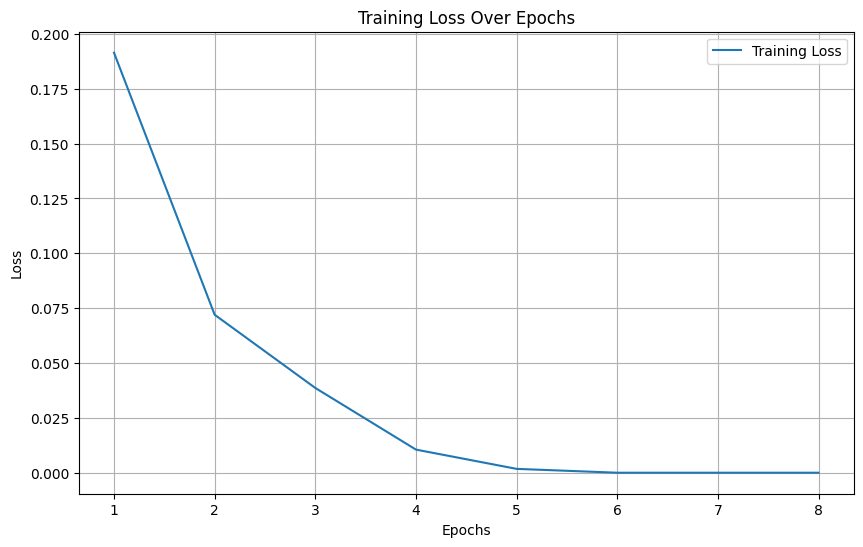

In [87]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [88]:
# print(df_resampled_train.value_counts())
print(label_resampled_train.value_counts())

Labels
 1        1156
-1        1122
Name: count, dtype: int64


In [89]:
label_resampled_train.iloc[0,0]

-1

In [90]:
def calculate_mcc(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == -1) & (y_pred == -1))
    fp = np.sum((y_true == -1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == -1))

    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return numerator / (denominator + np.finfo(float).eps)

In [91]:
def evaluate_model(nn, X_val, y_val):
    predictions = []

    for i in range(len(X_val)):
        inputs = X_val.iloc[i].values  # Convert DataFrame row to NumPy array
        output = nn.query(inputs)
        predicted_label = 1 if output[0] >= 0.5 else -1
        predictions.append(predicted_label)

    predictions = np.array(predictions)
    print(pd.DataFrame(predictions).value_counts())

    if isinstance(y_val, (pd.DataFrame, pd.Series)):
        y_val = y_val.values.flatten()
    mcc_score = calculate_mcc(y_val, predictions)
    return mcc_score

# Calculate MCC for the validation set
mcc_validation = evaluate_model(nn, df_resampled_val, label_resampled_val)
print(f"MCC on Validation Set: {mcc_validation}")

-1    298
 1    272
Name: count, dtype: int64
MCC on Validation Set: 0.957874725753854


In [78]:
df_resampled_val.head()

,0,1,2,3,4,5,6,7,8,9,...,7522,7523,7524,7525,7526,7527,7528,7529,7530,7531
1576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2175,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
test_vectorized_df = pd.DataFrame(test_vectorized)

In [67]:
def predict_model(nn, X_test):
    predictions = []

    for i in range(len(X_test)):
        inputs = X_test.iloc[i].values  # Convert DataFrame row to NumPy array
        output = nn.query(inputs)
        predicted_label = 1 if output[0] >= 0.5 else -1
        predictions.append(predicted_label)

    predictions = np.array(predictions)
    return predictions

# Calculate MCC for the validation set
predictions = predict_model(nn, test_vectorized_df)
print(type(predictions))

<class 'numpy.ndarray'>


In [68]:
np.savetxt('predictions.dat', predictions, delimiter='\t', fmt='%d')